In [1]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
import pandas as pd
import seaborn as sns
import src.normFunction as nf
import src.cg as CG
import scipy.sparse as sparse
from src.utility import make_plot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = "./matrix/"

In [4]:
M1 = np.loadtxt(PATH + 'M1.txt')
M2 = np.loadtxt(PATH + 'M2.txt')
M3 = np.loadtxt(PATH + 'M3.txt')
M4 = np.loadtxt(PATH + 'M4.txt')
M5 = np.loadtxt(PATH + 'M5.txt')

# Experiments on Matrix M1

In [5]:
errorsCG = []
gradientsCG = []

In [6]:
f = nf.normFunction(M1)

In [7]:
initial_vector = f.init_x()

In [8]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 454.0189, gradientNorm = 74.322151
Iteration number 2, -f(x) = 764.8549, gradientNorm = 30.836447
Iteration number 3, -f(x) = 875.9852, gradientNorm = 14.790424
Iteration number 4, -f(x) = 930.9561, gradientNorm = 7.433449
Iteration number 5, -f(x) = 953.2247, gradientNorm = 4.343554
Iteration number 6, -f(x) = 965.7037, gradientNorm = 2.993345
Iteration number 7, -f(x) = 973.9303, gradientNorm = 2.356104
Iteration number 8, -f(x) = 984.8301, gradientNorm = 2.308048
Iteration number 9, -f(x) = 997.0679, gradientNorm = 1.335569
Iteration number 10, -f(x) = 1004.4372, gradientNorm = 0.724736
Iteration number 11, -f(x) = 1008.6872, gradientNorm = 0.425058
Iteration number 12, -f(x) = 1011.0054, gradientNorm = 0.267985
Iteration number 13, -f(x) = 1012.2011, gradientNorm = 0.165999
Iteration number 14, -f(x) = 1012.7536, gradientNorm = 0.102950
Iteration number 15, -f(x) = 1012.9808, gradientNorm = 0.066132
Iteration number 16, -f(x) = 1013.0966, gradientNorm = 

In [9]:
norm = la.norm(M1, ord=2) ** 2

In [10]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [11]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [12]:
errorsCG[-1][-1]

3.641007621152674e-12

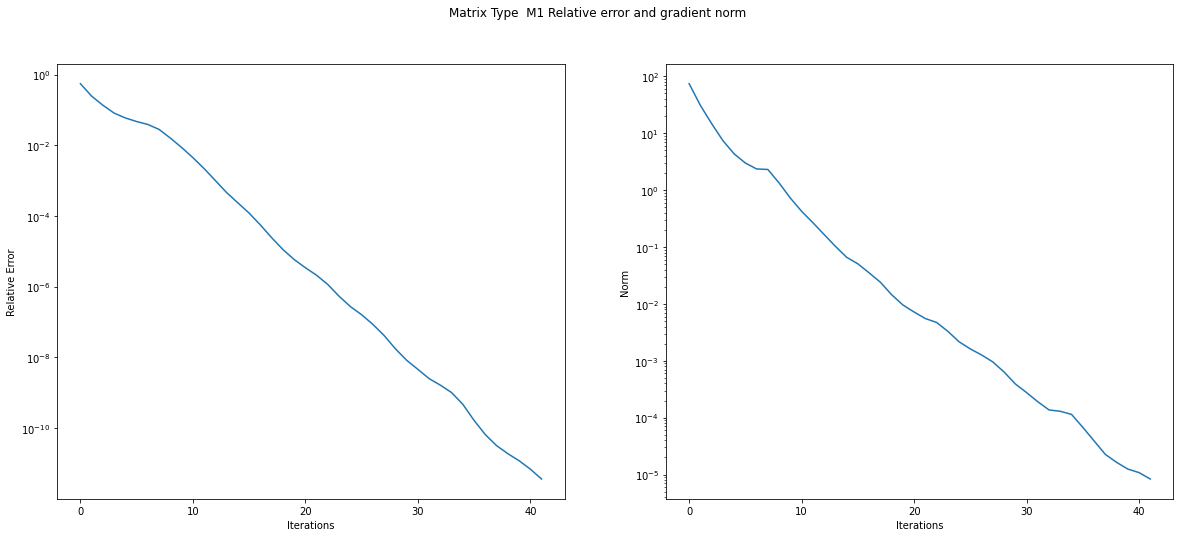

In [13]:
make_plot(gradientsCG, errorsCG,type='M1', experiment_name='exp1-M1-CG-PR')

In [14]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M1)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

4.91 ms ± 1.26 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [15]:
from scipy.optimize import minimize

In [16]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

5.56 ms ± 1.37 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M2

In [17]:
errorsCG = []
gradientsCG = []

In [18]:
f = nf.normFunction(M2)

In [19]:
initial_vector = f.init_x()

In [20]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 2127.9251, gradientNorm = 132.945961
Iteration number 2, -f(x) = 2386.0572, gradientNorm = 73.398822
Iteration number 3, -f(x) = 2515.8931, gradientNorm = 36.049913
Iteration number 4, -f(x) = 2584.5098, gradientNorm = 23.016420
Iteration number 5, -f(x) = 2621.1031, gradientNorm = 11.403480
Iteration number 6, -f(x) = 2633.6128, gradientNorm = 5.507442
Iteration number 7, -f(x) = 2637.6490, gradientNorm = 3.496100
Iteration number 8, -f(x) = 2640.0091, gradientNorm = 2.632064
Iteration number 9, -f(x) = 2641.2867, gradientNorm = 1.793325
Iteration number 10, -f(x) = 2641.9493, gradientNorm = 1.309785
Iteration number 11, -f(x) = 2642.3357, gradientNorm = 1.112093
Iteration number 12, -f(x) = 2642.6139, gradientNorm = 0.700894
Iteration number 13, -f(x) = 2642.6934, gradientNorm = 0.401307
Iteration number 14, -f(x) = 2642.7231, gradientNorm = 0.236933
Iteration number 15, -f(x) = 2642.7321, gradientNorm = 0.123402
Iteration number 16, -f(x) = 2642.7348, gra

In [21]:
norm = la.norm(M2, ord=2) ** 2

In [22]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [23]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [24]:
errorsCG[-1][-1]

2.064892014322189e-15

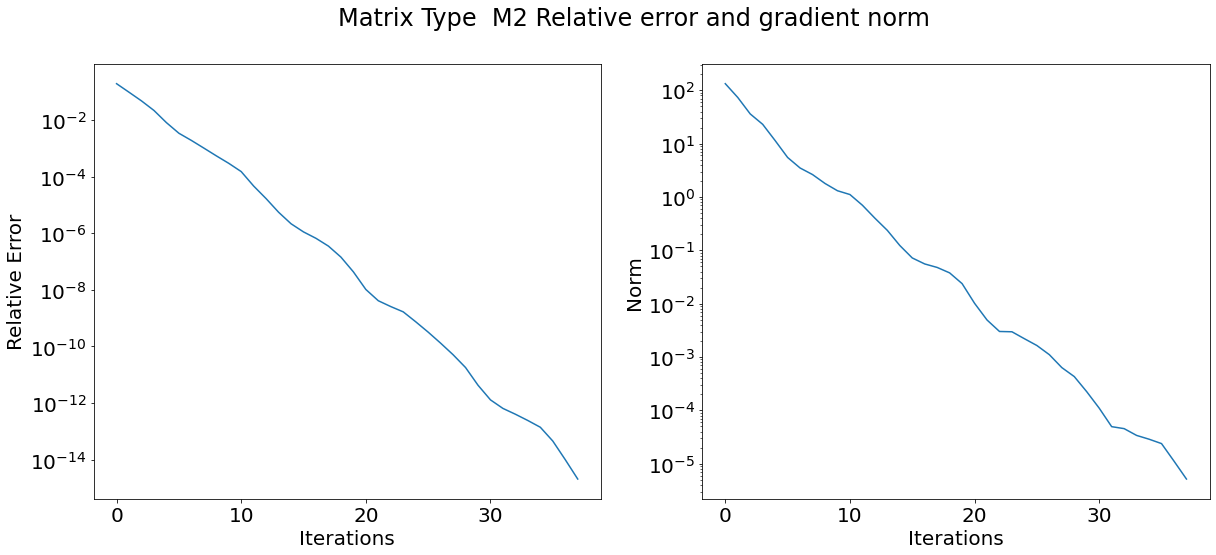

In [25]:
make_plot(gradientsCG, errorsCG,type='M2', experiment_name='exp1-M2-CG-PR')

In [26]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M2)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

3.52 ms ± 152 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [27]:
from scipy.optimize import minimize

In [28]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

2.71 ms ± 89.7 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M3

In [29]:
errorsCG = []
gradientsCG = []

In [30]:
f = nf.normFunction(M3)

In [31]:
initial_vector = f.init_x()

In [32]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 529.4073, gradientNorm = 43.778258
Iteration number 2, -f(x) = 608.1346, gradientNorm = 18.878857
Iteration number 3, -f(x) = 636.5345, gradientNorm = 11.440223
Iteration number 4, -f(x) = 656.3212, gradientNorm = 6.889813
Iteration number 5, -f(x) = 667.3282, gradientNorm = 4.280260
Iteration number 6, -f(x) = 673.5278, gradientNorm = 2.109372
Iteration number 7, -f(x) = 675.7713, gradientNorm = 1.143920
Iteration number 8, -f(x) = 676.7750, gradientNorm = 0.654872
Iteration number 9, -f(x) = 677.0474, gradientNorm = 0.356366
Iteration number 10, -f(x) = 677.1471, gradientNorm = 0.228995
Iteration number 11, -f(x) = 677.1998, gradientNorm = 0.176125
Iteration number 12, -f(x) = 677.2249, gradientNorm = 0.117572
Iteration number 13, -f(x) = 677.2394, gradientNorm = 0.103020
Iteration number 14, -f(x) = 677.2508, gradientNorm = 0.074405
Iteration number 15, -f(x) = 677.2546, gradientNorm = 0.041062
Iteration number 16, -f(x) = 677.2560, gradientNorm = 0.02197

In [33]:
norm = la.norm(M3, ord=2) ** 2

In [34]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [35]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [36]:
errorsCG[-1][-1]

3.6829318450607613e-13

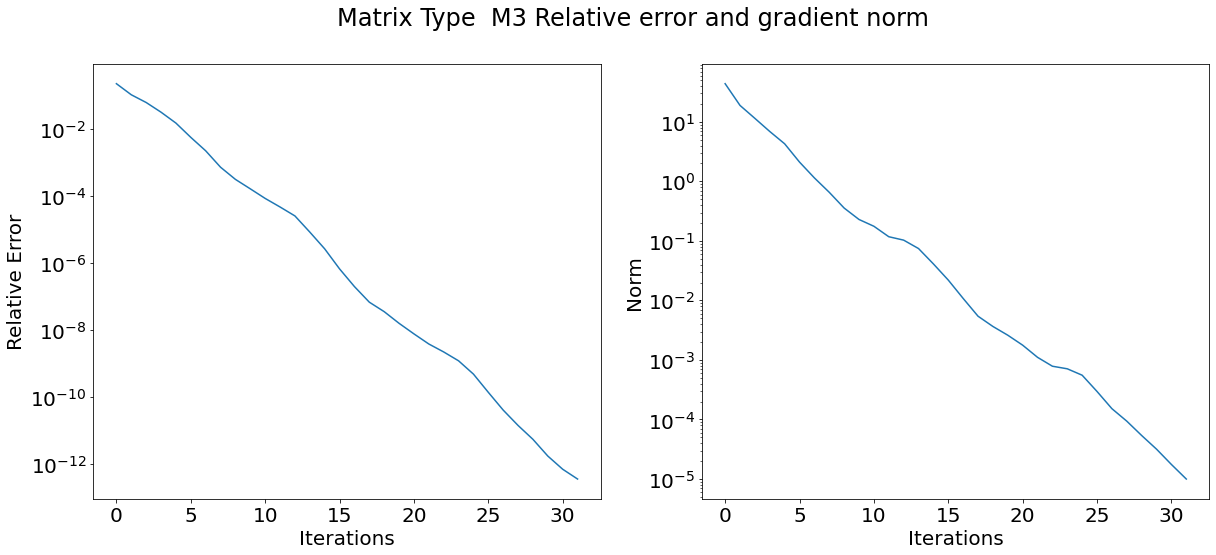

In [37]:
make_plot(gradientsCG, errorsCG, type='M3', experiment_name='exp1-M3-CG-PR')

In [38]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M3)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

3.02 ms ± 168 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [39]:
from scipy.optimize import minimize

In [40]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

2.7 ms ± 127 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M4

In [41]:
errorsCG = []
gradientsCG = []

In [42]:
f = nf.normFunction(M4)

In [43]:
initial_vector = f.init_x()

In [44]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 58.8900, gradientNorm = 27.282867
Iteration number 2, -f(x) = 2172.4868, gradientNorm = 3.567652
Iteration number 3, -f(x) = 2375.5173, gradientNorm = 1.765734
Iteration number 4, -f(x) = 2505.3227, gradientNorm = 0.844879
Iteration number 5, -f(x) = 2547.4748, gradientNorm = 0.495992
Iteration number 6, -f(x) = 2560.8843, gradientNorm = 0.533981
Iteration number 7, -f(x) = 2578.1115, gradientNorm = 0.341603
Iteration number 8, -f(x) = 2598.5813, gradientNorm = 0.263500
Iteration number 9, -f(x) = 2607.9222, gradientNorm = 0.276902
Iteration number 10, -f(x) = 2627.2753, gradientNorm = 0.157163
Iteration number 11, -f(x) = 2636.6258, gradientNorm = 0.113101
Iteration number 12, -f(x) = 2643.1892, gradientNorm = 0.060111
Iteration number 13, -f(x) = 2647.4464, gradientNorm = 0.040898
Iteration number 14, -f(x) = 2648.9330, gradientNorm = 0.020393
Iteration number 15, -f(x) = 2649.7996, gradientNorm = 0.013798
Iteration number 16, -f(x) = 2650.0837, gradientNo

In [45]:
norm = la.norm(M4, ord=2) ** 2

In [46]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [47]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [48]:
errorsCG[-1][-1]

2.266074691743132e-10

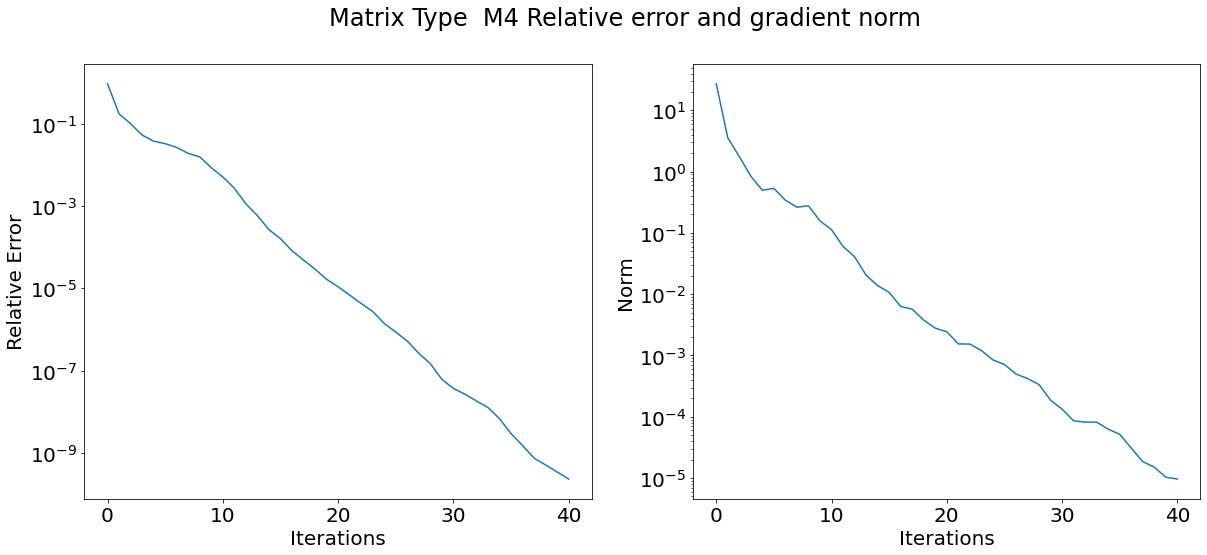

In [49]:
make_plot(gradientsCG, errorsCG, type='M4', experiment_name='exp1-M4-CG-PR')

In [ ]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M4)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
from scipy.optimize import minimize

In [ ]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

# Experiments on Matrix M5

In [ ]:
errorsCG = []
gradientsCG = []

In [ ]:
f = nf.normFunction(M5)

In [ ]:
initial_vector = f.init_x()

In [ ]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
norm = la.norm(M5, ord=2) ** 2

In [ ]:
norm

In [ ]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [ ]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [ ]:
errorsCG[-1][-1]

In [ ]:
make_plot(gradientsCG, errorsCG, type='M5', experiment_name='exp1-M5-CG-PR')

In [ ]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M5)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
from scipy.optimize import minimize

In [ ]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun